In [70]:
import xarray as xr
import os
import pandas as pd
import numpy as np
import functions.eddy_feedback as ef

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Calculating EFPs for CSV file

In [71]:
# data_path = '/home/links/ct715/data_storage/PAMIP/processed_daily/daily_efp_mon-avg'
# models = sorted(os.listdir(data_path))

# ds = {}
# for model in models:
    
#     path = os.path.join(data_path, model)
#     files = os.path.join(path, '*.nc')
#     if len(files) == 0:
#         print(f'No files found for {model}')
#         continue
#     ds[model] = xr.open_mfdataset(files, concat_dim='ens_ax', combine='nested')
    
# efp_data = []

# for model in models:
#     dataset = ds[model]
    
#     if model == 'HadGEM3-GC31-LL':
#         members = np.delete(dataset.ens_ax.values, [27,28])    # <------- REMOVED FROM STORE
#         dataset=dataset.sel(ens_ax=members)
    
#     efp_nh = ef.calculate_efp(dataset, data_type='pamip', calc_south_hemis=False)
#     efp_sh = ef.calculate_efp(dataset, data_type='pamip', calc_south_hemis=True)
    
#     efp_data.append({'model': model, 'efp_nh': efp_nh, 'efp_sh': efp_sh})

# efp_df = pd.DataFrame(efp_data)

# efp_df.to_csv('./data/daily_efp_8models.csv')
    

See this [Notebook](/home/links/ct715/eddy_feedback/chapter1/efp_random/check_data/HadGEM3_daily_efp.ipynb) for data manipulation of certain models.

# Daily EFP

EFP values calculated using EP fluxes which are calculated using daily u,v.

In [72]:
efp_df = pd.read_csv('/home/links/ct715/eddy_feedback/chapter1/efp_random/data/daily_efp_8models.csv', index_col=0)

# colours
from pypalettes import load_cmap
cmap = load_cmap("Cross")
models = efp_df['model'].unique()
colors = [cmap(i / (len(models) - 1)) for i in range(len(models))]
palette = dict(zip(models, colors))

## Compare with reanalysis

In [73]:
# # Uncomment the following lines to calculate EFP for JRA55 reanalysis data
# jra_path = '/home/links/ct715/data_storage/reanalysis/jra55_daily'
# ds = xr.open_mfdataset(f'{jra_path}/jra55_uvtw_ubar_ep.nc')
# nh_efp = ef.calculate_efp(ds, data_type='reanalysis', which_div1='div1')
# sh_efp = ef.calculate_efp(ds, data_type='reanalysis', which_div1='div1', calc_south_hemis=True)
# efp_df.loc[len(efp_df)] = ["JRA55", nh_efp, sh_efp]
# efp_df.to_csv('./data/daily_efp_8models+jra55.csv')

# Load data and separate JRA55
pamip = pd.read_csv('/home/links/ct715/eddy_feedback/chapter1/efp_random/data/daily_efp_8models+jra55.csv', index_col=0)
jra = pamip[pamip['model'] == 'JRA55'].copy().reset_index(drop=True)
pamip = pamip.drop(8)
pamip

,model,efp_nh,efp_sh
0,AWI-CM-1-1-MR,0.2592,0.2557
1,CNRM-CM6-1,0.2244,0.1944
2,CanESM5,0.3133,0.3271
3,FGOALS-f3-L,0.2353,0.1273
4,HadGEM3-GC31-LL,0.1735,0.1729
5,HadGEM3-GC31-MM,0.2525,0.1874
6,IPSL-CM6A-LR,0.2623,0.2015
7,MIROC6,0.1592,0.2058


# Compare with original EFP data

In [74]:
# Import original EFP data for comparison
og_efp = pd.read_csv('/home/links/ct715/eddy_feedback/chapter1/efp_random/data/non-regridded_efp.csv', index_col=0)
og_efp


,model,efp_nh,efp_sh
0,CESM1-WACCM-SC,0.1297,0.0295
1,CESM2,0.3693,0.3419
2,CNRM-CM6-1,0.2421,0.2082
3,CanESM5,0.4256,0.4618
4,E3SMv1,0.0543,0.0542
5,EC-EARTH3,0.2945,0.3135
6,ECHAM6.3,0.0139,0.0103
7,FGOALS-f3-L,0.2354,0.1274
8,HadGEM3-GC31-LL,0.2730,0.2951
9,HadGEM3-GC31-MM,0.3137,0.3002


In [ ]:
og_efp_matched = og_efp[og_efp['model'].isin(efp_df['model'])].reset_index(drop=True)

# fabricate and add AWI into the dataframe
og_efp_matched.loc[len(og_efp_matched)] = ["AWI-CM-1-1-MR", 0.3724, 0.4354]
og_efp_matched = og_efp_matched.sort_values(by='model').reset_index(drop=True)

# Calculate EFP for JRA55 reanalysis data using SRIP dataset
og_jra_path = '/home/links/ct715/data_storage/reanalysis/srip_datasets'
og_ds = xr.open_mfdataset(f'{og_jra_path}/JRA55_srip_ubar_div1.nc')
og_nh_efp = ef.calculate_efp(og_ds, data_type='reanalysis', which_div1='div1_pr')
og_sh_efp = ef.calculate_efp(og_ds, data_type='reanalysis', which_div1='div1_pr', calc_south_hemis=True)
og_efp_matched.loc[len(og_efp_matched)] = ["JRA55", og_nh_efp, og_sh_efp]

# Separate JRA55 from the rest of the dataframe
og_jra_efp = og_efp_matched[og_efp_matched['model'] == 'JRA55'].copy().reset_index(drop=True)
og_efp_matched = og_efp_matched.drop(8)

## Comparing on the same figure

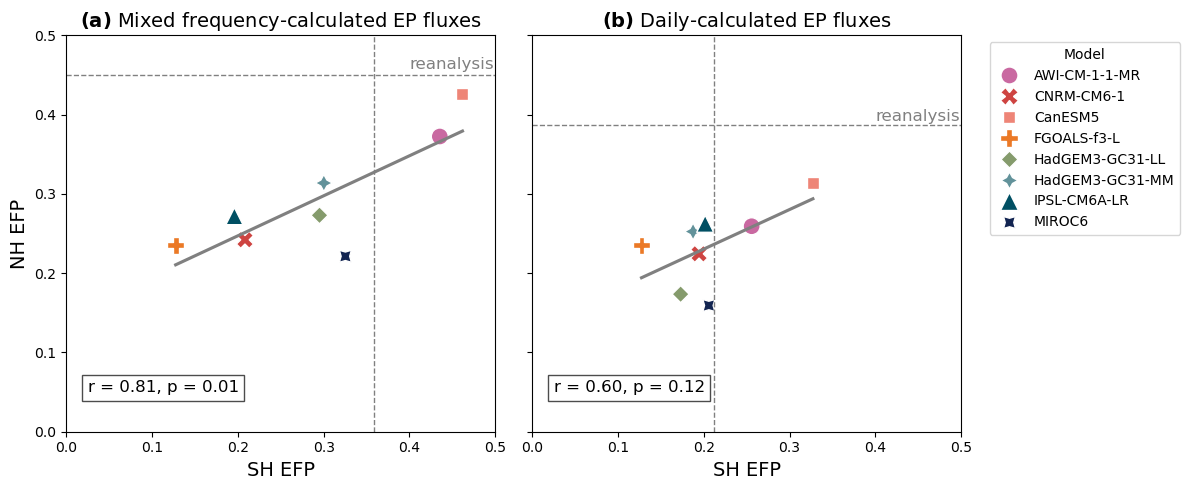

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# Panel (a)
sns.regplot(ax=axes[0], data=og_efp_matched, x='efp_sh', y='efp_nh',
            scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(ax=axes[0], data=og_efp_matched, x='efp_sh', y='efp_nh',
                hue='model', style='model', s=150, palette=palette)

r, p = sp.stats.pearsonr(x=og_efp_matched['efp_nh'], y=og_efp_matched['efp_sh'])
axes[0].text(0.05, 0.1, f"r = {r:.2f}, p = {p:.2f}", transform=axes[0].transAxes,
             bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[0].text(0.8, 0.915, f"reanalysis", transform=axes[0].transAxes,
             color='gray', fontsize=12)

axes[0].set_xlabel('SH EFP', fontsize=14)
axes[0].set_ylabel('NH EFP', fontsize=14)
axes[0].set_xlim(0, 0.5)
axes[0].set_ylim(0, 0.5)
axes[0].axvline(og_jra_efp['efp_sh'].values[0], color='gray', linestyle='--', linewidth=1)
axes[0].axhline(og_jra_efp['efp_nh'].values[0], color='gray', linestyle='--', linewidth=1)
axes[0].set_title('$\\bf{(a)}$ Mixed frequency-calculated EP fluxes', fontsize=14)
axes[0].legend_.remove()

# Panel (b)
sns.regplot(ax=axes[1], data=pamip, x='efp_sh', y='efp_nh',
            scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(ax=axes[1], data=pamip, x='efp_sh', y='efp_nh',
                hue='model', style='model', s=150, palette=palette)

r, p = sp.stats.pearsonr(x=pamip['efp_nh'], y=pamip['efp_sh'])
axes[1].text(0.05, 0.1, f"r = {r:.2f}, p = {p:.2f}", transform=axes[1].transAxes,
             bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
axes[1].text(0.8, 0.785, f"reanalysis", transform=axes[1].transAxes,
             color='gray', fontsize=12)

axes[1].set_xlabel('SH EFP', fontsize=14)
axes[1].set_ylabel('')  # no label on right subplot
axes[1].set_xlim(0, 0.5)
axes[1].set_ylim(0, 0.5)
axes[1].axvline(jra['efp_sh'].values[0], color='gray', linestyle='--', linewidth=1)
axes[1].axhline(jra['efp_nh'].values[0], color='gray', linestyle='--', linewidth=1)
axes[1].set_title('$\\bf{(b)}$ Daily-calculated EP fluxes', fontsize=14)
axes[1].legend_.remove()

# Move legend outside the left panel now
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Model')

plt.tight_layout()

save_path = '/home/links/ct715/eddy_feedback/chapter1/zz_paper_plots'
# plt.savefig(os.path.join(save_path, 'sub-daily_vs_daily.png'), bbox_inches='tight')
plt.show()
